# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [159]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [160]:
# Set the API base URL
# import json
url = f"http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        #print(json.dumps(city_weather_json, indent=4, sort_keys=True)) # see how things are organized
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['city']['coord']['lat']
        city_lng = city_weather_json['city']['coord']['lon']
        list_of_max_temps = [item['main']['temp_max'] for item in city_weather_json['list']] # generate list
        city_max_temp = np.max(list_of_max_temps) # max value of list
        city_max_temp_celsius = round(city_max_temp - 273.15, 2) # convert to celsius
        index_of_hottest_day = list_of_max_temps.index(city_max_temp) # get index from list
        city_humidity = city_weather_json['list'][index_of_hottest_day]['main']['humidity'] # use index for other queries
        city_clouds = city_weather_json['list'][index_of_hottest_day]['clouds']['all']
        city_wind = city_weather_json['list'][index_of_hottest_day]['wind']['speed']
        city_country = city_weather_json['city']['country']
        city_date = city_weather_json['list'][index_of_hottest_day]['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp_celsius,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | bac lieu
Processing Record 3 of Set 1 | ta`u
Processing Record 4 of Set 1 | bloemfontein
Processing Record 5 of Set 1 | batticaloa
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | evans
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | vilyuysk
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | murun-kuren
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | moro
Processing Record 17 of Set 1 | kailua-kona
Processing Record 18 of Set 1 | nyrob
Processing Record 19 of Set 1 | penzance
Processing Record 20 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 21 of Set 1 | waitangi
Processing Record 22 

In [161]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
print(city_data_df)

# Show Record Count
city_data_df.count()

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        tolanaro -25.0319   46.9987     25.25        47           7   
1        bac lieu   9.2850  105.7244     31.32        61          98   
2            ta`u -14.2336 -169.5144     27.48        72          88   
3    bloemfontein -29.1211   26.2140     24.07        20          33   
4      batticaloa   7.7102   81.6924     33.04        47          98   
..            ...      ...       ...       ...       ...         ...   
556        mhamid  29.8200   -5.7200     47.34         3           9   
557  porto seguro -16.4497  -39.0647     25.09        66          51   
558       timoteo -19.5825  -42.6444     28.54        44          26   
559    calingasta -31.3308  -69.4078     26.23         8          55   
560    kombissiri  12.0656   -1.3375     35.38        38         100   

     Wind Speed Country        Date  
0          5.90      MG  1690707600  
1          5.68      VN  1690783200  
2          4.44      

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [162]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,25.25,47,7,5.90,MG,1690707600
1,bac lieu,9.2850,105.7244,31.32,61,98,5.68,VN,1690783200
2,ta`u,-14.2336,-169.5144,27.48,72,88,4.44,AS,1690783200
3,bloemfontein,-29.1211,26.2140,24.07,20,33,10.06,ZA,1690545600
4,batticaloa,7.7102,81.6924,33.04,47,98,0.71,LK,1690610400


In [163]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [164]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,25.25,47,7,5.90,MG,1690707600
1,bac lieu,9.2850,105.7244,31.32,61,98,5.68,VN,1690783200
2,ta`u,-14.2336,-169.5144,27.48,72,88,4.44,AS,1690783200
3,bloemfontein,-29.1211,26.2140,24.07,20,33,10.06,ZA,1690545600
4,batticaloa,7.7102,81.6924,33.04,47,98,0.71,LK,1690610400


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

City_ID
0     -25.0319
1       9.2850
2     -14.2336
3     -29.1211
4       7.7102
        ...   
556    29.8200
557   -16.4497
558   -19.5825
559   -31.3308
560    12.0656
Name: Lat, Length: 561, dtype: float64
City_ID
0      25.25
1      31.32
2      27.48
3      24.07
4      33.04
       ...  
556    47.34
557    25.09
558    28.54
559    26.23
560    35.38
Name: Max Temp, Length: 561, dtype: float64


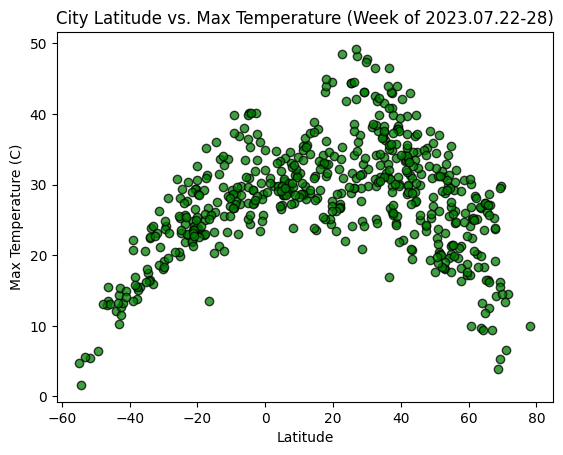

<Figure size 640x480 with 0 Axes>

In [165]:
# Build scatter plot for latitude vs. temperature
# Set x axis to numerical value for latitude
x_axis_scatter = city_data_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for max temperature in degree celsius
y_axis_scatter1 = city_data_df['Max Temp']
print(y_axis_scatter1)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter1, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Incorporate the other graph properties
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Max Temperature (Week of 2023.07.22-28)")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

City_ID
0     -25.0319
1       9.2850
2     -14.2336
3     -29.1211
4       7.7102
        ...   
556    29.8200
557   -16.4497
558   -19.5825
559   -31.3308
560    12.0656
Name: Lat, Length: 561, dtype: float64
City_ID
0      47
1      61
2      72
3      20
4      47
       ..
556     3
557    66
558    44
559     8
560    38
Name: Humidity, Length: 561, dtype: int64


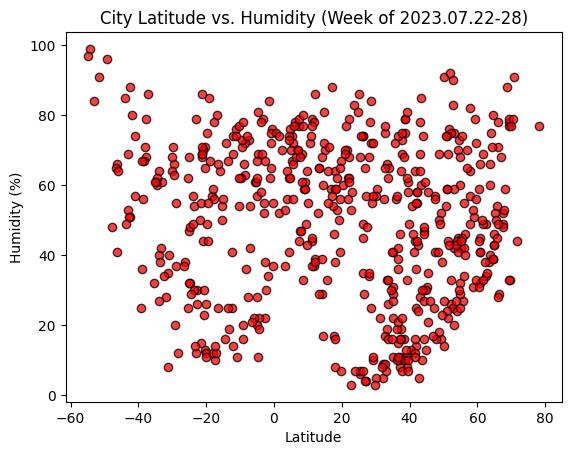

<Figure size 640x480 with 0 Axes>

In [166]:
# Build the scatter plots for latitude vs. humidity
# Set x axis to numerical value for latitude
x_axis_scatter = city_data_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for humidity in percentage
y_axis_scatter2 = city_data_df['Humidity']
print(y_axis_scatter2)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter2, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Humidity (Week of 2023.07.22-28)")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

City_ID
0     -25.0319
1       9.2850
2     -14.2336
3     -29.1211
4       7.7102
        ...   
556    29.8200
557   -16.4497
558   -19.5825
559   -31.3308
560    12.0656
Name: Lat, Length: 561, dtype: float64
City_ID
0        7
1       98
2       88
3       33
4       98
      ... 
556      9
557     51
558     26
559     55
560    100
Name: Cloudiness, Length: 561, dtype: int64


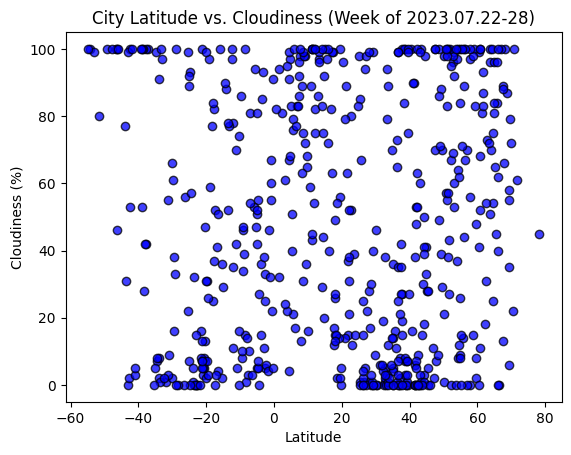

<Figure size 640x480 with 0 Axes>

In [167]:
# Build the scatter plots for latitude vs. cloudiness
# Set x axis to numerical value for latitude
x_axis_scatter = city_data_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for cloudiness in percentage
y_axis_scatter3 = city_data_df['Cloudiness']
print(y_axis_scatter3)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter3, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Cloudiness (Week of 2023.07.22-28)")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

City_ID
0     -25.0319
1       9.2850
2     -14.2336
3     -29.1211
4       7.7102
        ...   
556    29.8200
557   -16.4497
558   -19.5825
559   -31.3308
560    12.0656
Name: Lat, Length: 561, dtype: float64
City_ID
0       5.90
1       5.68
2       4.44
3      10.06
4       0.71
       ...  
556     5.46
557     3.52
558     2.28
559     1.47
560     1.04
Name: Wind Speed, Length: 561, dtype: float64


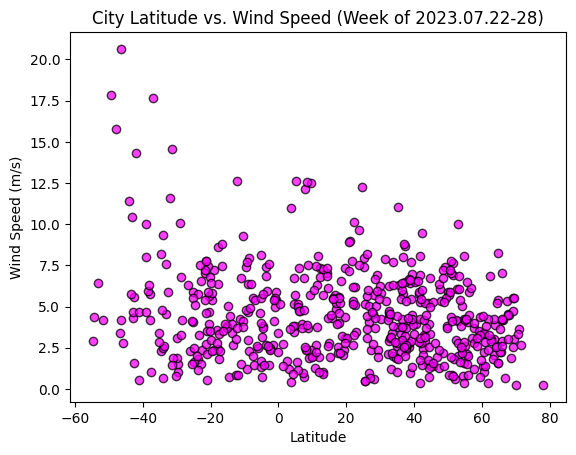

<Figure size 640x480 with 0 Axes>

In [168]:
# Build the scatter plots for latitude vs. wind speed
# Set x axis to numerical value for latitude
x_axis_scatter = city_data_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for wind speed in percentage
y_axis_scatter4 = city_data_df['Wind Speed']
print(y_axis_scatter4)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter4, marker="o", facecolors="magenta", edgecolors="black",
             alpha=0.75)

# Incorporate the other graph properties
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Wind Speed (Week of 2023.07.22-28)")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


y = 0.04x + 27.13


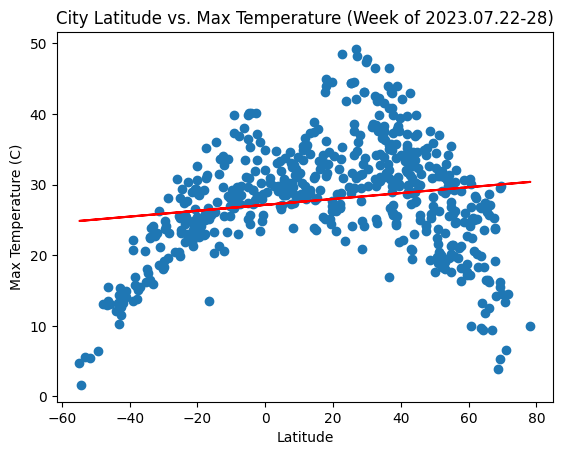

In [169]:
# Define a function to create Linear Regression plot for Fig1
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter1)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_axis_scatter,y_axis_scatter1)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Max Temperature (Week of 2023.07.22-28)")
plt.show()

y = -0.09x + 51.02


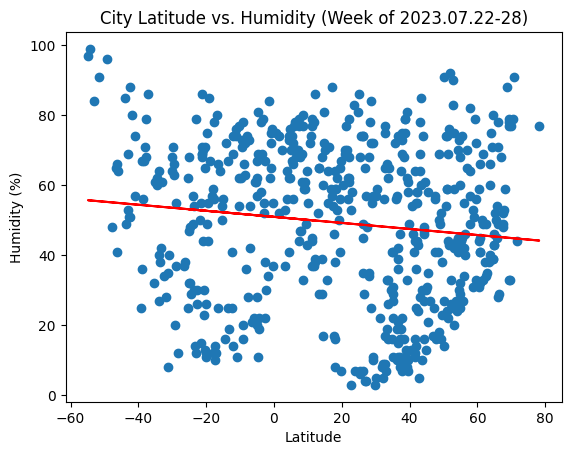

In [170]:
# Define a function to create Linear Regression plot for Fig2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter2)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_axis_scatter,y_axis_scatter2)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Humidity (Week of 2023.07.22-28)")
plt.show()

y = 0.05x + 45.69


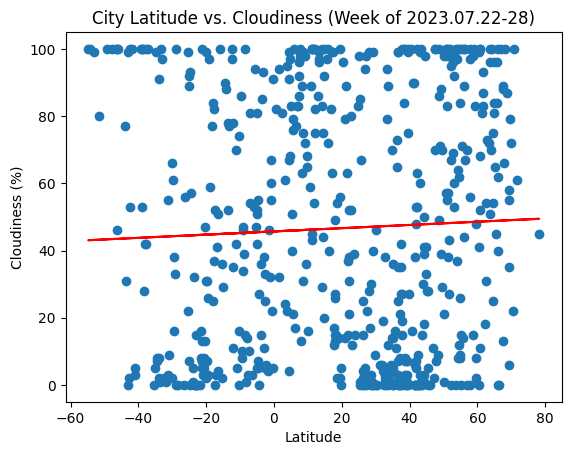

In [171]:
# Define a function to create Linear Regression plot for Fig3
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter3)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_axis_scatter,y_axis_scatter3)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Cloudiness (Week of 2023.07.22-28)")
plt.show()

y = -0.02x + 4.7


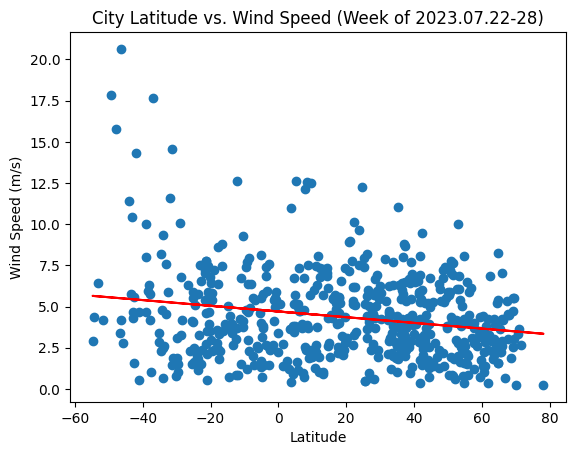

In [172]:
# Define a function to create Linear Regression plot for Fig4
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter4)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_axis_scatter,y_axis_scatter4)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Wind Speed (Week of 2023.07.22-28)")
plt.show()

In [173]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bac lieu,9.2850,105.7244,31.32,61,98,5.68,VN,1690783200
4,batticaloa,7.7102,81.6924,33.04,47,98,0.71,LK,1690610400
7,evans,33.5337,-82.1307,39.90,26,12,3.38,US,1690750800
10,vilyuysk,63.7553,121.6247,26.67,40,51,2.05,RU,1690524000
11,ribeira grande,38.5167,-28.7000,24.58,79,7,2.54,PT,1690740000


In [174]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,25.25,47,7,5.90,MG,1690707600
2,ta`u,-14.2336,-169.5144,27.48,72,88,4.44,AS,1690783200
3,bloemfontein,-29.1211,26.2140,24.07,20,33,10.06,ZA,1690545600
5,edinburgh of the seven seas,-37.0676,-12.3116,15.47,86,100,17.63,SH,1690761600
6,puerto natales,-51.7236,-72.4875,5.42,91,80,4.16,CL,1690653600


###  Temperature vs. Latitude Linear Regression Plot

City_ID
1       9.2850
4       7.7102
7      33.5337
10     63.7553
11     38.5167
        ...   
553    33.9431
554    22.2333
555    32.8473
556    29.8200
560    12.0656
Name: Lat, Length: 385, dtype: float64
City_ID
1      31.32
4      33.04
7      39.90
10     26.67
11     24.58
       ...  
553    30.49
554    33.68
555    24.50
556    47.34
560    35.38
Name: Max Temp, Length: 385, dtype: float64
y = -0.19x + 36.47
The r value is: -0.4628715233744211


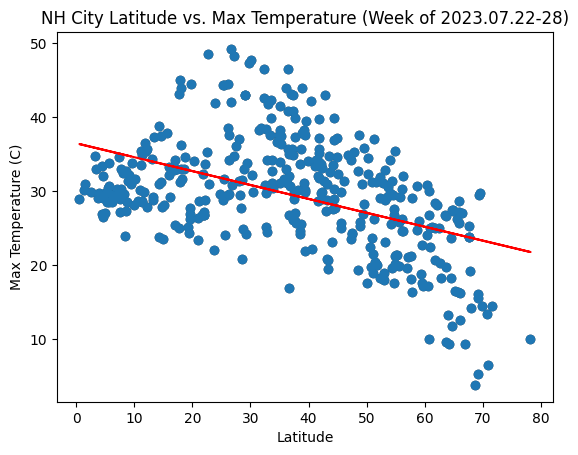

In [175]:
# Linear regression on Northern Hemisphere for Fig5
# Build scatter plot for latitude vs. temperature
# Set x axis to numerical value for latitude
x_axis_scatter = northern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for max temperature in degree celsius
y_axis_scatter5 = northern_hemi_df['Max Temp']
print(y_axis_scatter5)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter5, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig5
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter5)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter5)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title("NH City Latitude vs. Max Temperature (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("../output_data/Fig5.png")

plt.show()

City_ID
0     -25.0319
2     -14.2336
3     -29.1211
5     -37.0676
6     -51.7236
        ...   
534   -24.5333
543   -23.8650
557   -16.4497
558   -19.5825
559   -31.3308
Name: Lat, Length: 176, dtype: float64
City_ID
0      25.25
2      27.48
3      24.07
5      15.47
6       5.42
       ...  
534    29.45
543    27.42
557    25.09
558    28.54
559    26.23
Name: Max Temp, Length: 176, dtype: float64
y = 0.44x + 33.79
The r value is: 0.8245327853022354


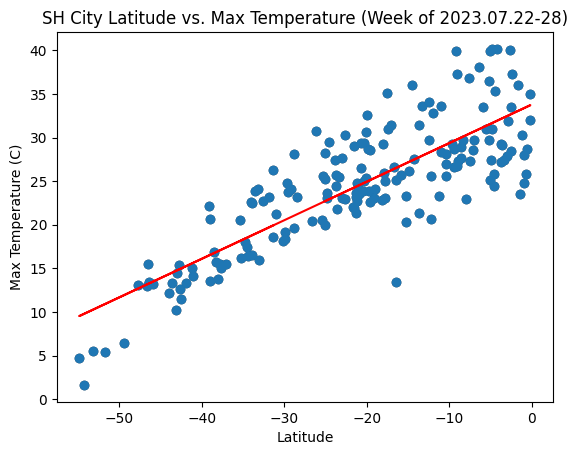

In [176]:
# Linear regression on Southern Hemisphere for Fig6
# Build scatter plot for latitude vs. temperature
# Set x axis to numerical value for latitude
x_axis_scatter = southern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for max temperature in degree celsius
y_axis_scatter6 = southern_hemi_df['Max Temp']
print(y_axis_scatter6)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter6, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig6
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter6)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter6)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title("SH City Latitude vs. Max Temperature (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("../output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:The northern hemisphere chart has a negativeslope and r value while te southern hemisphere has a positive slope and r value. For the northern hemisphere, as the latitude (x-axis) increases, the max temperture (y-axis) decreases. For the southern hemisphere, as the latitude (x-axis) increases, the max temperture (y-axis) increases.

### Humidity vs. Latitude Linear Regression Plot

City_ID
1       9.2850
4       7.7102
7      33.5337
10     63.7553
11     38.5167
        ...   
553    33.9431
554    22.2333
555    32.8473
556    29.8200
560    12.0656
Name: Lat, Length: 385, dtype: float64
City_ID
1      61
4      47
7      26
10     40
11     79
       ..
553    65
554    61
555    65
556     3
560    38
Name: Humidity, Length: 385, dtype: int64
y = -0.12x + 52.83
The r value is: -0.10212285096396752


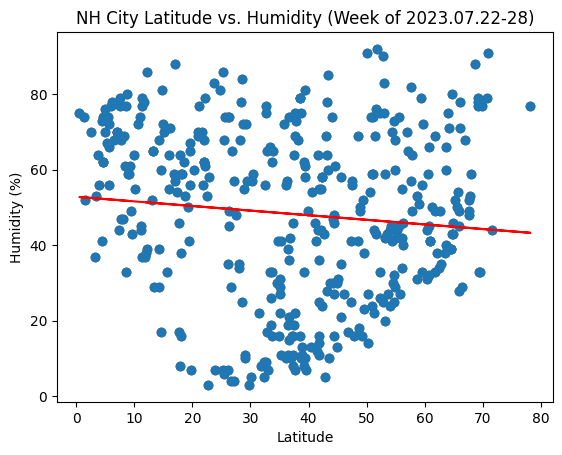

In [177]:
# Linear regression on Northern Hemisphere for Fig7
# Build scatter plot for latitude vs. humidity
# Set x axis to numerical value for latitude
x_axis_scatter = northern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for humidity
y_axis_scatter7 = northern_hemi_df['Humidity']
print(y_axis_scatter7)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter7, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig7
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter7)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter7)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("NH City Latitude vs. Humidity (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("../output_data/Fig7.png")

plt.show()

City_ID
0     -25.0319
2     -14.2336
3     -29.1211
5     -37.0676
6     -51.7236
        ...   
534   -24.5333
543   -23.8650
557   -16.4497
558   -19.5825
559   -31.3308
Name: Lat, Length: 176, dtype: float64
City_ID
0      47
2      72
3      20
5      86
6      91
       ..
534    29
543    57
557    66
558    44
559     8
Name: Humidity, Length: 176, dtype: int64
y = -0.27x + 46.06
The r value is: -0.16528195593062803


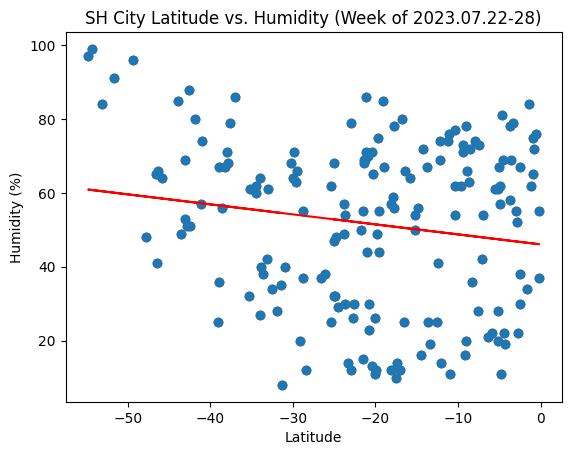

In [178]:
# Linear regression on Southern Hemisphere for Fig8
# Build scatter plot for latitude vs. humidity
# Set x axis to numerical value for latitude
x_axis_scatter = southern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for humidity
y_axis_scatter8 = southern_hemi_df['Humidity']
print(y_axis_scatter8)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter8, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig8
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter8)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter8)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("SH City Latitude vs. Humidity (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("../output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship: Both the northern hemisphere and southern hemisphere charts have slight negative slopes and r values, but the data is relatively scattered. In both cases, as the latitude (x-axis) increases, the humidity (y-axis) slightly decreases, but this relationship is more distinguishable in the southern hemisphere chart.

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
1       9.2850
4       7.7102
7      33.5337
10     63.7553
11     38.5167
        ...   
553    33.9431
554    22.2333
555    32.8473
556    29.8200
560    12.0656
Name: Lat, Length: 385, dtype: float64
City_ID
1       98
4       98
7       12
10      51
11       7
      ... 
553      2
554     21
555      3
556      9
560    100
Name: Cloudiness, Length: 385, dtype: int64
y = -0.01x + 49.14
The r value is: -0.005098383199510319


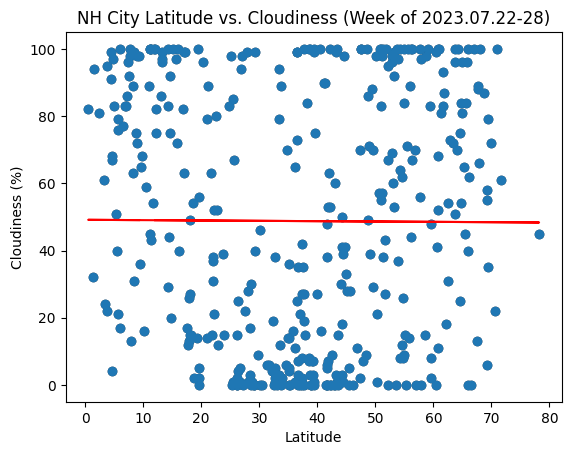

In [179]:
# Linear regression on Northern Hemisphere for Fig9
# Build scatter plot for latitude vs. cloudiness
# Set x axis to numerical value for latitude
x_axis_scatter = northern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for cloudiness
y_axis_scatter9 = northern_hemi_df['Cloudiness']
print(y_axis_scatter9)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter9, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig9
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter9)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter9)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("NH City Latitude vs. Cloudiness (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("../output_data/Fig9.png")

plt.show()

City_ID
0     -25.0319
2     -14.2336
3     -29.1211
5     -37.0676
6     -51.7236
        ...   
534   -24.5333
543   -23.8650
557   -16.4497
558   -19.5825
559   -31.3308
Name: Lat, Length: 176, dtype: float64
City_ID
0        7
2       88
3       33
5      100
6       80
      ... 
534     57
543      5
557     51
558     26
559     55
Name: Cloudiness, Length: 176, dtype: int64
y = -0.58x + 29.63
The r value is: -0.21639595381580376


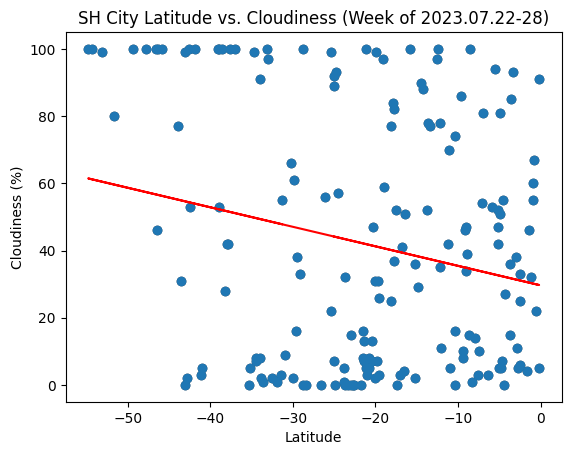

In [180]:
# Linear regression on Southern Hemisphere for Fig10
# Build scatter plot for latitude vs. cloudiness
# Set x axis to numerical value for latitude
x_axis_scatter = southern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for cloudiness
y_axis_scatter10 = southern_hemi_df['Cloudiness']
print(y_axis_scatter10)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter10, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig10
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter10)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter10)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("SH City Latitude vs. Cloudiness (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("../output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship: Both the northern hemisphere and southern hemisphere charts have  negative slopes and r values, but the data for the northern hemisphere is nearly linear and relatively scattered. In both cases, as the latitude (x-axis) increases, the cloudiness (y-axis) slightly decreases, but this relationship is much more distinguishable in the southern hemisphere chart.
Note: A slope of zero means that there is no change in the dependent variable as the independent variable increases. This means that the two variables are not correlated. This is apparent in the northern hemisphere chart for cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
1       9.2850
4       7.7102
7      33.5337
10     63.7553
11     38.5167
        ...   
553    33.9431
554    22.2333
555    32.8473
556    29.8200
560    12.0656
Name: Lat, Length: 385, dtype: float64
City_ID
1      5.68
4      0.71
7      3.38
10     2.05
11     2.54
       ... 
553    7.70
554    3.27
555    4.57
556    5.46
560    1.04
Name: Wind Speed, Length: 385, dtype: float64
y = -0.02x + 5.03
The r value is: -0.1875351667479555


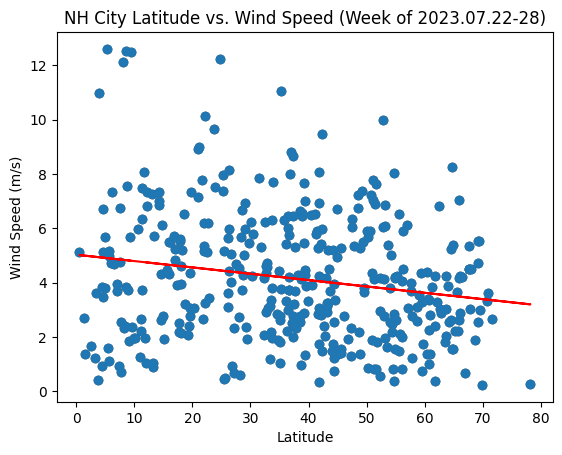

In [181]:
# Linear regression on Northern Hemisphere for Fig11
# Build scatter plot for latitude vs. wind speed
# Set x axis to numerical value for latitude
x_axis_scatter = northern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for wind speed
y_axis_scatter11 = northern_hemi_df['Wind Speed']
print(y_axis_scatter11)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter11, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig11
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter11)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter11)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title("NH City Latitude vs. Wind Speed (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("../output_data/Fig11.png")

plt.show()

City_ID
0     -25.0319
2     -14.2336
3     -29.1211
5     -37.0676
6     -51.7236
        ...   
534   -24.5333
543   -23.8650
557   -16.4497
558   -19.5825
559   -31.3308
Name: Lat, Length: 176, dtype: float64
City_ID
0       5.90
2       4.44
3      10.06
5      17.63
6       4.16
       ...  
534     5.07
543     2.00
557     3.52
558     2.28
559     1.47
Name: Wind Speed, Length: 176, dtype: float64
y = -0.06x + 3.5
The r value is: -0.2613653462828284


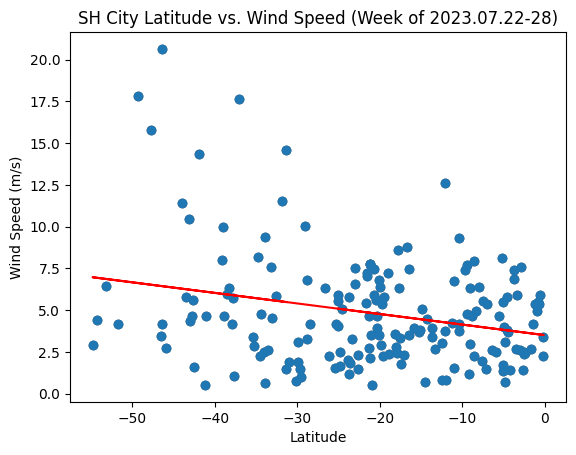

In [182]:
# Linear regression on Southern Hemisphere for Fig12
# Build scatter plot for latitude vs. wind speed
# Set x axis to numerical value for latitude
x_axis_scatter = southern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for wind speed
y_axis_scatter12 = southern_hemi_df['Wind Speed']
print(y_axis_scatter12)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter12, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig12
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter12)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter12)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title("SH City Latitude vs. Wind Speed (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("../output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship: Both the northern hemisphere and southern hemisphere charts have  negative slopes and r values. In both cases, as the latitude (x-axis) increases, the wind speed (y-axis) slightly decreases.